# Predicting Invariant Mass of Dielectron Events Using Deep Learning: A Comparative Study of DNN and CNN Approaches

## 1. Introduction


**Objective**: The primary goal of this project is to predict the invariant mass (M) of dielectron events in high-energy physics using deep learning techniques. We compare the performance of a simple Deep Neural Network (DNN) with a Convolutional Neural Network (CNN) by converting the tabular data into image representations.

## 2. Background
**Invariant Mass in Particle Physics**: Invariant mass is a crucial quantity in particle physics, often used to identify particles produced in collision events. In this project, we focus on predicting the invariant mass of two electrons produced in such events, using their kinematic properties.

**Dataset Description**: The dataset contains 100k dielectron events with features like energy, momentum components, transverse momentum, pseudorapidity, azimuthal angle, and charge for each electron. The target variable is the invariant mass (M) of the electron pair.

## 3. Dataset

In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataset
file_path = '/kaggle/input/cern-electron-collision-data/dielectron.csv'
data = pd.read_csv(file_path)
data = data2.dropna()  # we drop any null values
features = np.array(data.columns.delete(-1))
target = 'M'

data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


**Features:**
* Run and Event: Identifiers for each event.
* E1, E2: Total energy of the electrons.
* px1, py1, pz1, px2, py2, pz2: Momentum components for each electron.
* pt1, pt2: Transverse momentum.
* eta1, eta2: Pseudorapidity.
* phi1, phi2: Azimuthal angle.
* Q1, Q2: Charge of each electron.
* M: The target variable, representing the invariant mass.

## 5. Data Preprocessing

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Run,99915.0,1.479354e+05,9.203155e+02,146511.000000,1.471140e+05,1.479290e+05,1.490110e+05,1.491820e+05
Event,99915.0,4.957471e+08,4.037736e+08,6414.000000,2.023716e+08,3.902917e+08,6.339332e+08,1.791247e+09
E1,99915.0,3.646011e+01,4.122534e+01,0.377928,8.472775e+00,2.174020e+01,5.005925e+01,8.506020e+02
px1,99915.0,1.358578e-01,1.340932e+01,-250.587000,-5.237190e+00,1.416610e-01,5.718920e+00,1.345390e+02
py1,99915.0,1.832109e-01,1.347467e+01,-126.079000,-5.281100e+00,1.005440e-01,5.652355e+00,1.474670e+02
pz1,99915.0,-1.509100e+00,5.162533e+01,-840.987000,-1.589865e+01,-3.133600e-01,1.323440e+01,7.600960e+02
pt1,99915.0,1.441820e+01,1.239121e+01,0.219629,3.773670e+00,1.297290e+01,2.002605e+01,2.655780e+02
eta1,99915.0,-6.414323e-02,1.462626e+00,-4.165380,-1.284650e+00,-6.135220e-02,1.145405e+00,2.622970e+00
phi1,99915.0,2.200181e-02,1.799506e+00,-3.141580,-1.526580e+00,3.501540e-02,1.562680e+00,3.141420e+00
Q1,99915.0,-5.494670e-03,9.999899e-01,-1.000000,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00


We can drop non-feature columns like Run and Event to focus on relevant physical quantities.


 Features are normalized to ensure consistent scaling.

In [53]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the features
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

print(data.head())

# Drop non-feature columns
df = data.drop(['Run', 'Event'], axis=1)
df_columns = df.columns
features = df_columns[:-1]
target = 'M'




        Run     Event        E1      px1        py1       pz1       pt1  \
0  0.226133  0.204681  0.068613  0.631678  0.499404  0.489475  0.047485   
1  0.226133  0.204717  0.007332  0.639881  0.458786  0.522068  0.014971   
2  0.226133  0.204945  0.029597  0.620852  0.468370  0.539455  0.043117   
3  0.226133  0.204856  0.076472  0.670168  0.504362  0.565151  0.052164   
4  0.226133  0.204616  0.071831  0.658330  0.407450  0.488029  0.055390   

       eta1      phi1   Q1        E2       px2       py2       pz2       pt2  \
0  0.289129  0.846608  1.0  0.011405  0.504701  0.460900  0.404989  0.007523   
1  0.462109  0.022082  0.0  0.017593  0.481535  0.483101  0.419158  0.045191   
2  0.822860  0.972017  1.0  0.016191  0.503746  0.474171  0.402153  0.009481   
3  0.940399  0.660320  1.0  0.026010  0.515807  0.475252  0.427449  0.017101   
4  0.305174  0.281719  0.0  0.014152  0.506338  0.459153  0.403359  0.008574   

       eta2      phi2   Q2         M  
0  0.466232  0.170109  0.0   

### Physics and Mathematical Background

#### Invariant Mass ($M$):

- In high-energy physics, the invariant mass of two particles is given by:
  
  $$
  M = \sqrt{2 \cdot p_{T1} \cdot p_{T2} \cdot (\cosh(\Delta \eta) - \cos(\Delta \phi))}
  $$
  
  where:
  - $p_{T1}$ and $p_{T2}$ are the transverse momenta of the two electrons.
  - $\Delta \eta = |\eta_1 - \eta_2|$ is the difference in pseudorapidity.
  - $\Delta \phi = |\phi_1 - \phi_2|$ is the difference in the azimuthal angle.

#### Delta Quantities:

- $\Delta R = \sqrt{\Delta \eta^2 + \Delta \phi^2}$ is a crucial measure that describes the separation between two particles in the detector plane, capturing both angular differences.


#### Image Channels

1. **Channel 1:** 
   - Encodes transverse momenta and invariant mass: 
     \[
     $\text{Channel 1} $= \begin{bmatrix} p_{T1} & p_{T2} \\ M & 0 \end{bmatrix}
     \]
   
2. **Channel 2:**
   - Encodes pseudorapidity and azimuthal angles:
     \[
     $\text{Channel 2} $= \begin{bmatrix} \eta_1 & \eta_2 \\ \phi_1 & \phi_2 \end{bmatrix}
     \]

3. **Channel 3:**
   - Encodes relative angular differences and separation:
     \[
     $\text{Channel 3}$= \begin{bmatrix} \Delta \phi & \Delta \eta \\ \Delta R & M \end{bmatrix}
     \]

These channels are stacked to form a multi-channel image, resized to 40x40 pixels to ensure uniform input dimensions for the CNN. This transformation encodes key physical properties and relationships into a spatial format, enabling the CNN to learn complex interactions between the features that may be difficult for traditional models to capture.

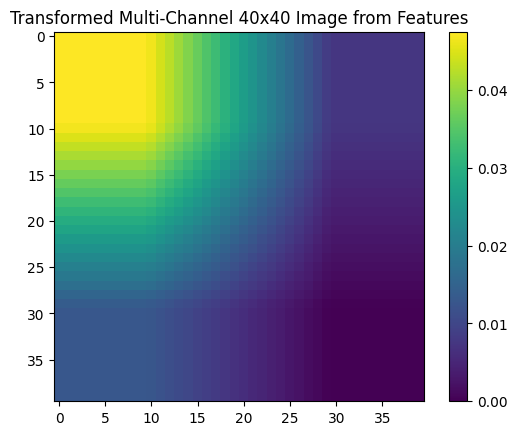

In [54]:
# Function to create multi-channel image
def create_multi_channel_image(row):
    delta_phi = np.abs(row['phi1'] - row['phi2'])
    delta_eta = np.abs(row['eta1'] - row['eta2'])
    delta_R = np.sqrt(delta_phi**2 + delta_eta**2)
    invariant_mass = np.sqrt(2 * row['pt1'] * row['pt2'] * (np.cosh(delta_eta) - np.cos(delta_phi)))
    
    channel_1 = np.array([[row['pt1'], row['pt2']], [invariant_mass, 0]])
    channel_2 = np.array([[row['eta1'], row['eta2']], [row['phi1'], row['phi2']]])
    channel_3 = np.array([[delta_phi, delta_eta], [delta_R, invariant_mass]])
    
    image = np.stack((channel_1, channel_2, channel_3), axis=-1)
    large_image = tf.image.resize(image, [40, 40])
    
    return large_image.numpy().astype(float)

# Apply the function to each row to create images
df['image'] = df.apply(create_multi_channel_image, axis=1)


import matplotlib.pyplot as plt
# Display an example image for the first channel (e.g., transverse momentum and invariant mass)
plt.imshow(df['image'].iloc[0][:, :, 0], cmap='viridis')  # Display the first channel
plt.colorbar()
plt.title('Transformed Multi-Channel 40x40 Image from Features')
plt.show()

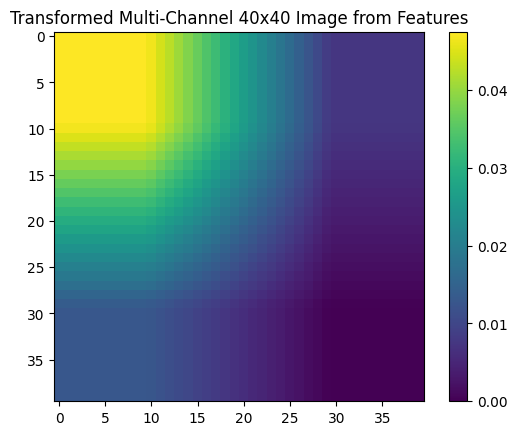

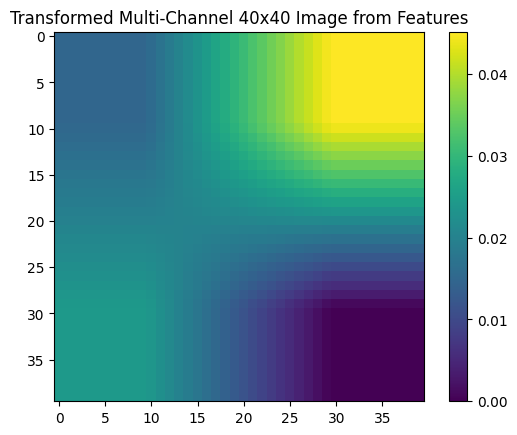

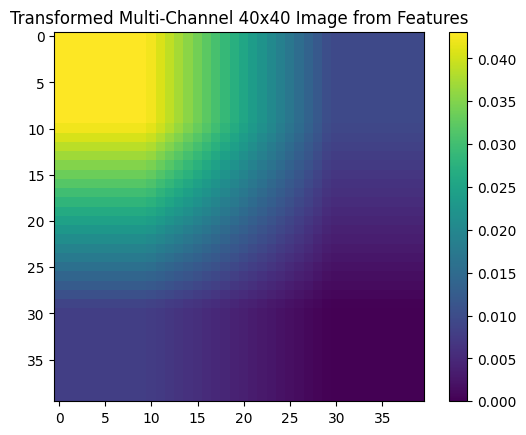

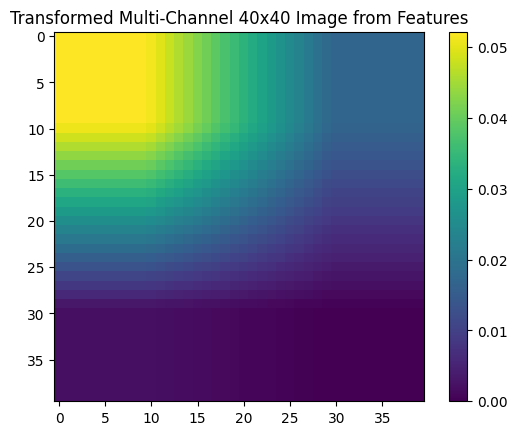

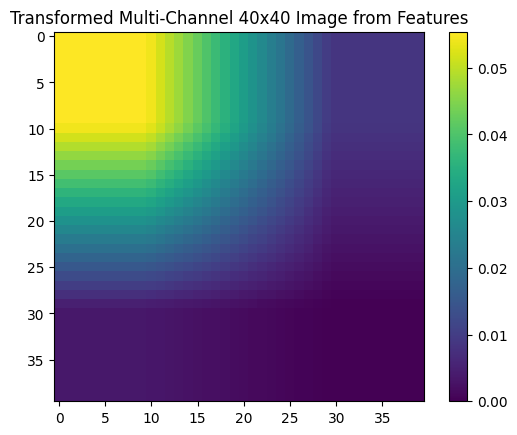

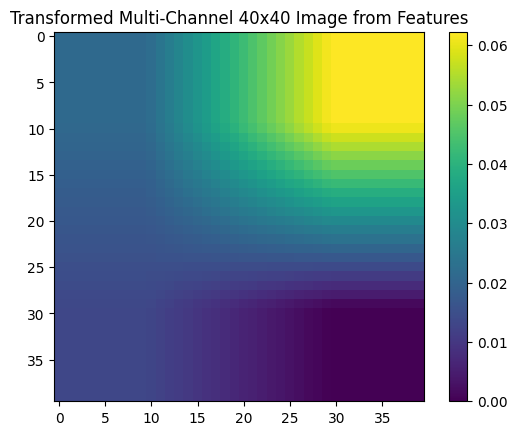

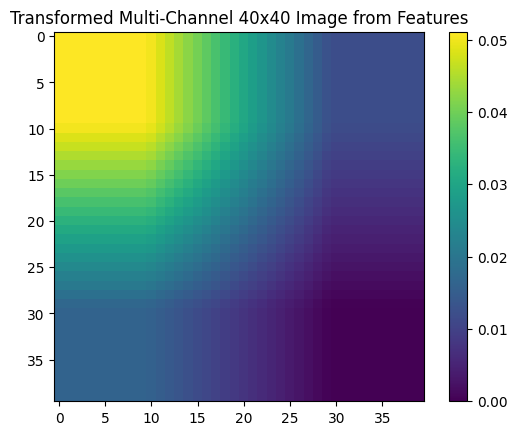

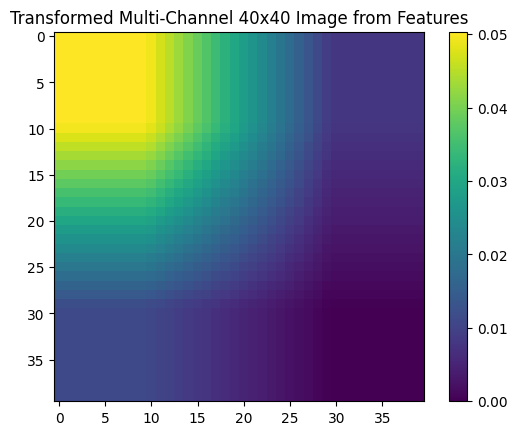

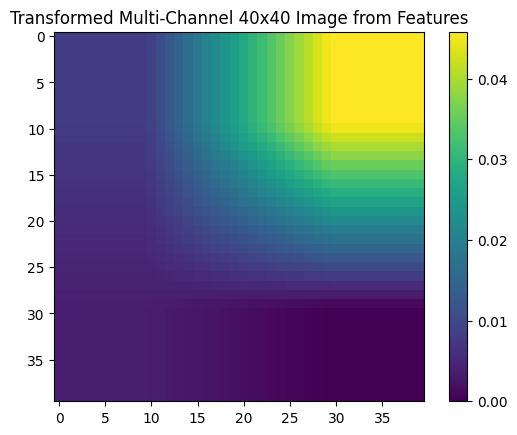

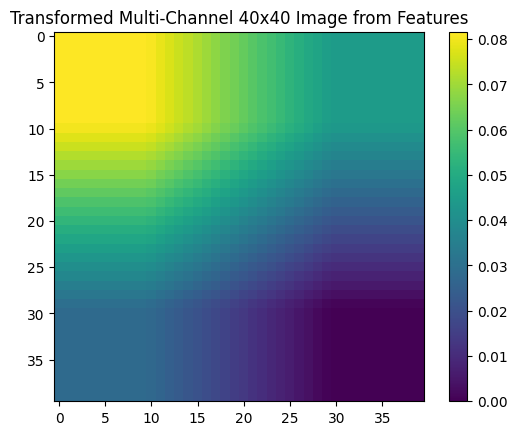

In [55]:
# Display an example image for the first channel (e.g., transverse momentum and invariant mass)
for i in range(0,10):
    plt.imshow(df['image'].iloc[i][:,:,0], cmap='viridis')  # Display the first channel
    plt.colorbar()
    plt.title('Transformed Multi-Channel 40x40 Image from Features')
    plt.show()

## Building and Training the Convolutional Neural Network (CNN)
In this section, we construct and train a Convolutional Neural Network (CNN) to predict the invariant mass of dielectron events using the generated multi-channel images.

### First we convert the images into a Tensorflow object

In [56]:
# Convert DataFrame to TensorFlow Dataset
def create_dataset(df):
    images = np.stack(df['image'].values)
    labels = df[target].values
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(buffer_size=1000).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(df)

### Convolutional Neural Network (CNN) Architecture and Training

This section details the CNN architecture designed to predict the invariant mass from the transformed multi-channel images. The network is implemented using TensorFlow and Keras.

**Model Architecture:**
- **Input Layer:** 
  - Accepts 40x40 pixel images with 3 channels.
  
- **Convolutional Layers:**
  - **Conv2D (32 filters, 3x3 kernel, `tanh` activation):** 
    - Extracts low-level features from the input images.
  - **MaxPooling2D (2x2 pool size):** 
    - Reduces the spatial dimensions by half, helping to downsample the feature maps.
  - **Conv2D (64 filters, 3x3 kernel, `tanh` activation):** 
    - Captures more complex patterns.
  - **MaxPooling2D (2x2 pool size):** 
    - Further reduces the spatial dimensions.
  - **Conv2D (64 filters, 3x3 kernel, `tanh` activation):** 
    - Further refines feature extraction.

- **Fully Connected Layers:**
  - **Flatten Layer:** 
    - Transforms the 3D feature maps into 1D feature vectors.
  - **Dense Layer (64 units, `tanh` activation):** 
    - Learns higher-level representations.
  - **Output Layer (1 unit):** 
    - Predicts the invariant mass as a single continuous value.

**Model Compilation:**
- **Optimizer:** Adam with a learning rate of 0.0001.
- **Loss Function:** Mean Squared Error (MSE) for regression.
- **Metric:** Mean Absolute Error (MAE) to evaluate performance.

**Training and Evaluation:**
- The model is trained for 5 epochs using the prepared dataset.
- The final loss and MAE are computed to assess the model’s performance on predicting the invariant mass.

In [58]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(train_dataset, epochs=10)

# Evaluate the model
loss, mae = model.evaluate(train_dataset)
print(f'Loss: {loss}, MAE: {mae}')


Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 113s 71ms/step - loss: 408.4805 - mae: 13.7526
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - loss: 59.5517 - mae: 5.4235
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - loss: 37.9318 - mae: 4.3537
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 144s 71ms/step - loss: 26.8674 - mae: 3.6442
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - loss: 19.7923 - mae: 3.1233
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - loss: 15.1376 - mae: 2.7380
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 143s 70ms/step - loss: 12.1460 - mae: 2.4638
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - loss: 10.0357 - mae: 2.2326
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 146s 74ms/step - loss: 8.3772 - mae: 2.0235
Epoch 10/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - loss: 6.9227 - mae: 1.8066
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 5.6105 - mae: 1.6208
Loss: 5.592475891113281, MAE: 1.6188822984695435


Lets Further train the model for 5 more epochs

In [59]:
df

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,image
0,0.068613,0.631678,0.499404,0.489475,0.047485,0.289129,0.846608,1.0,0.011405,0.504701,0.460900,0.404989,0.007523,0.466232,0.170109,0.0,8.94841,"[[[0.0474851094186306, 0.2891291677951813, 0.6..."
1,0.007332,0.639881,0.458786,0.522068,0.014971,0.462109,0.022082,0.0,0.017593,0.481535,0.483101,0.419158,0.045191,0.777541,0.935321,1.0,15.89300,"[[[0.014971417374908924, 0.46210935711860657, ..."
2,0.029597,0.620852,0.468370,0.539455,0.043117,0.822860,0.972017,1.0,0.016191,0.503746,0.474171,0.402153,0.009481,0.455265,0.841996,1.0,38.38770,"[[[0.043116677552461624, 0.8228597640991211, 0..."
3,0.076472,0.670168,0.504362,0.565151,0.052164,0.940399,0.660320,1.0,0.026010,0.515807,0.475252,0.427449,0.017101,0.927870,0.590088,0.0,3.72862,"[[[0.05216443911194801, 0.9403993487358093, 0...."
4,0.071831,0.658330,0.407450,0.488029,0.055390,0.305174,0.281719,0.0,0.014152,0.506338,0.459153,0.403359,0.008574,0.458364,0.231864,0.0,2.74718,"[[[0.05539026856422424, 0.3051742911338806, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.014038,0.622988,0.479786,0.527365,0.043804,0.654961,0.928211,0.0,0.001402,0.508391,0.461850,0.412290,0.006012,0.728138,0.313568,1.0,8.44779,"[[[0.04380367323756218, 0.654961347579956, 0.6..."
99996,0.021272,0.671058,0.516228,0.520835,0.063426,0.554018,0.673817,1.0,0.015000,0.503865,0.459616,0.402873,0.009443,0.462297,0.161490,1.0,20.71540,"[[[0.06342581659555435, 0.5540182590484619, 0...."
99997,0.004479,0.642163,0.459778,0.523644,0.011563,0.507090,0.014953,1.0,0.076321,0.482920,0.437173,0.367092,0.051215,0.470540,0.111021,0.0,12.71350,"[[[0.011563158594071865, 0.5070900917053223, 0..."
99998,0.063612,0.680140,0.504339,0.557692,0.061099,0.888755,0.628635,0.0,0.008560,0.507760,0.476797,0.416984,0.010918,0.863374,0.730588,1.0,4.69670,"[[[0.06109914928674698, 0.8887550234794617, 0...."


## Test 2: Fully Connected Deep Neural Network (MLP)

In [60]:
### DNN
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Drop irrelevant columns and split into features and target
df2 = data.drop(['Run', 'Event'], axis=1)
X = df2.drop('M', axis=1).values
y = df2['M'].values

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Definition and Training

In this section, we define, compile, and train a deep neural network (DNN) for regression tasks. The code is implemented using TensorFlow and Keras libraries.

#### Model Definition

We use the `Sequential` model from Keras to build our neural network, which consists of the following layers:

1. **Input Layer**:
   - `Dense(64, activation='relu', input_shape=(X_train.shape[1],))`
   - A dense layer with 64 units and ReLU (Rectified Linear Unit) activation function. The `input_shape` is specified to match the feature dimension of the training data.

2. **Hidden Layer**:
   - `Dense(32, activation='relu')`
   - A dense layer with 32 units and ReLU activation function. This layer introduces non-linearity to the model.

3. **Output Layer**:
   - `Dense(1)`
   - A dense layer with a single unit, without an activation function, suitable for regression tasks where the output is a continuous value.

#### Model Compilation

The model is compiled with the following settings:
- **Optimizer**: Adam with a learning rate of 0.001, which adjusts the weights of the network based on the gradient of the loss function.
- **Loss Function**: Mean Squared Error (MSE), commonly used for regression tasks to measure the average squared difference between predicted and actual values.
- **Metrics**: Mean Absolute Error (MAE) to evaluate the average magnitude of errors in predictions.

```python
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])


In [61]:

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with no activation function for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history2 = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# Print training history
print("Training complete. Training history:", history2.history)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2498/2498 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 637.4851 - mae: 18.7200 - val_loss: 158.9830 - val_mae: 8.4979
Epoch 2/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 121.5074 - mae: 7.5060 - val_loss: 75.1825 - val_mae: 5.8740
Epoch 3/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 69.8793 - mae: 5.7289 - val_loss: 53.0251 - val_mae: 5.0251
Epoch 4/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 50.6153 - mae: 4.8644 - val_loss: 42.8982 - val_mae: 4.6380
Epoch 5/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 43.8164 - mae: 4.5586 - val_loss: 39.1610 - val_mae: 4.5227
Epoch 6/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 40.2601 - mae: 4.4196 - val_loss: 41.1819 - val_mae: 4.9313
Epoch 7/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 37.5853 - mae: 4.2746 - val_loss: 34.0383 - val_mae: 4.0304
Epoch 8/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 36.4493 - mae: 4.2077 - val_loss: 35.7211 - val_mae: 4.1253
Epoch 9/10
2498/2498 ━━━━━━━━━━

## Comparing The Performance of CNN vs DNN for invariant mass prediction

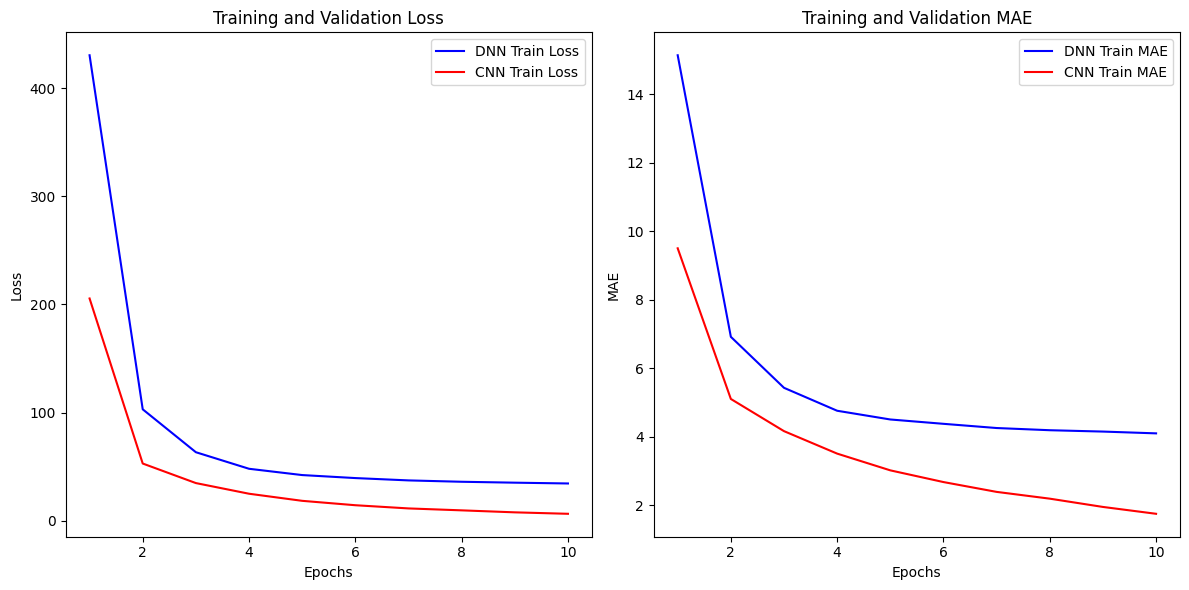

In [63]:
import matplotlib.pyplot as plt

# Extract metrics from history
dnn_loss = history2.history['loss']
dnn_mae = history2.history['mae']

cnn_loss = history.history['loss']
cnn_mae = history.history['mae']

# Number of epochs
epochs_dnn = range(1, len(dnn_loss) + 1)
epochs_cnn = range(1, len(cnn_loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_dnn, dnn_loss, 'b-', label='DNN Train Loss')
plt.plot(epochs_cnn, cnn_loss, 'r-', label='CNN Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting MAE
plt.subplot(1, 2, 2)
plt.plot(epochs_dnn, dnn_mae, 'b-', label='DNN Train MAE')
plt.plot(epochs_cnn, cnn_mae, 'r-', label='CNN Train MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()


### Results Comparison: CNN vs. DNN

In this study, we compared the performance of a Convolutional Neural Network (CNN) and a Deep Neural Network (DNN) on a regression task using a dataset of dielectron events. Both models were trained for 10 epochs.

**Performance Metrics:**

- **CNN:**
  - **Loss:** 5.592
  - **Mean Absolute Error (MAE):** 1.619

- **DNN:**
  - **Loss:** 35.012
  - **Mean Absolute Error (MAE):** 4.116

**Observations:**

From the results, it is evident that the CNN outperforms the DNN in both loss and MAE. This suggests that the CNN is more effective in capturing the underlying patterns and relationships in the data, leading to better predictive performance. 

The curves in the training and validation plots show that the CNN achieves lower loss and MAE more quickly than the DNN, indicating faster convergence and more accurate predictions.



### Discussion on "Information" Loss and GNNs

The goal of this study was to investigate the effectiveness of using image-based representations of data and compare it with traditional approaches. The results highlight a crucial aspect of machine learning in particle physics: **information loss** in data representation.

#### Information Loss in Image Representations

In particle physics, data from detectors can be sparse and irregular, making it challenging to represent them as fixed grids or images. For instance, CNNs were used to process image representations of calorimeter data from the ATLAS detector to classify particle jets. However, the inherent irregularity of the data and the potential loss of information due to projection into a fixed grid can limit the performance of CNNs.

#### Why GNNs are Optimal

Graph Neural Networks (GNNs) offer a more natural and effective approach for handling particle physics data:

1. **Natural Representation**:
   - Particle physics data can be represented as graphs, where nodes correspond to detector hits or particles, and edges represent the relationships between them. This representation captures the inherent irregularity and sparsity of the data more accurately than fixed grids or images.

2. **Preservation of Information**:
   - GNNs are designed to work with graph-structured data, allowing them to learn and predict complex relationships between nodes without imposing artificial constraints. This results in better preservation of information and more accurate predictions.

3. **Versatility**:
   - GNNs have been successfully applied to various particle physics tasks such as jet classification, particle tracking, and event classification. They excel in capturing the interactions and relationships between different particles or detector hits, making them well-suited for complex analyses.

In conclusion, while CNNs have shown superior performance in this comparison, the information loss inherent in image-based representations underscores the need for more advanced methods. GNNs, with their ability to naturally handle graph-based data, present a promising alternative for addressing the challenges associated with sparse and irregular data in particle physics.

